bank customer satisfaction using CNN and feature selection

In [0]:
pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 36kB/s 
     |████████████████████████████████| 450kB 38.9MB/s 
     |████████████████████████████████| 3.8MB 31.6MB/s 
     |████████████████████████████████| 81kB 10.2MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled goo

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
print(tf.__version__) 

2.0.0


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [0]:
!git clone https://github.com/laxmimerit/Data-Files-for-Feature-Selection.git


Cloning into 'Data-Files-for-Feature-Selection'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 17 (delta 6), reused 10 (delta 2), pack-reused 0
Unpacking objects: 100% (17/17), done.


In [0]:
data = pd.read_csv('/content/Data-Files-for-Feature-Selection/santander-train.csv')
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [0]:
data.shape

(76020, 371)

In [0]:
x = data.drop(labels =['ID','TARGET'], axis = 1)
x.shape

(76020, 369)

In [0]:
y = data['TARGET']
y.shape

(76020,)

In [0]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,stratify = y)

In [0]:
x_train.shape, x_test.shape

((60816, 369), (15204, 369))

remove constants, quashi constants and duplicates

In [0]:
filter = VarianceThreshold(0.01) # if any col has variance less than 1% then it will be dropped
x_train = filter.fit_transform(x_train)
x_test = filter.transform(x_test)

In [0]:
x_train.shape, x_test.shape

((60816, 267), (15204, 267))

here we can see 369-267 = 102 features are dropped or filtered

Now its time to remove duplicates

for removing duplicates we will convert rows into columns(by doing transpose) and drop those with duplicate value and again transpose the result to get the actual format.
Twice transpose to get original design

In [0]:
x_train_T = x_train.T
x_test_T = x_test.T

In [0]:
x_train_T = pd.DataFrame(x_train_T)
x_test_T = pd.DataFrame(x_test_T)


In [0]:
x_train_T.shape

(267, 60816)

In [0]:
x_train_T.duplicated().sum()  # gives how many features are duplicated

16

In [0]:
duplicated_features = x_train_T.duplicated()  
duplicated_features  # if True then duplicated else not duplicated

0      False
1      False
2      False
3      False
4      False
       ...  
262    False
263    False
264    False
265    False
266    False
Length: 267, dtype: bool

In [0]:
features_to_keep = [not index for index in duplicated_features]
features_to_keep  # this inverts the value means False if duplicated and True if not

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 Tru

In [0]:
# AGAIN TRANSPOSE
x_train = x_train_T[features_to_keep]
x_train.shape

(251, 60816)

from 267 to 251, means the duplicated are dropped.
Why did we convert True to False and vice versa?                 ans=> The reason is that  x_train = x_train_T[features_to_keep]
this code assigns only the true value from features_to_keep to x_train

now transpose it again


In [0]:
x_train = x_train.T
x_train.shape

(60816, 251)

doing the same for testing data.
This can also be done using function


In [0]:
x_test_T.duplicated().sum()

32

In [0]:
duplicated_features_test = x_test_T.duplicated()  
features_to_keep_test = [not index for index in duplicated_features_test]


In [0]:
x_test = x_test_T[features_to_keep]
x_test.shape

(251, 15204)

In [0]:
x_test = x_test.T
x_test.shape

(15204, 251)

I did the same for x_test what I did previously for x_train

In [0]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,39,41,...,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266
0,2.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,3.0,0.42,3.0,2.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,171199.230000
1,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3.0,3.0,3.0,1.35,3.0,2.46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20828.070000
2,2.0,54.0,0.0,95.4,95.4,0.0,0.0,0.0,0.0,0.0,95.4,95.4,0.0,0.0,95.4,0.0,0.0,95.4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3.0,18.0,11976.6,4373.70,13539.0,9963.09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,121172.010000
3,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
4,2.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118181.040000


there are a lot of variances in our dataset so we need to use StandardScalar.

In [0]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train

array([[ 0.03890445, -0.63451614, -0.05352825, ..., -0.01832219,
        -0.0204875 ,  0.30135829],
       [ 0.03890445, -0.78884607, -0.05352825, ..., -0.01832219,
        -0.0204875 , -0.5361839 ],
       [ 0.03890445,  1.60326788, -0.05352825, ..., -0.01832219,
        -0.0204875 ,  0.02271505],
       ...,
       [ 0.03890445, -0.40302124, -0.05352825, ..., -0.01832219,
        -0.0204875 , -0.34584568],
       [ 0.03890445, -0.17152634, -0.05352825, ..., -0.01832219,
        -0.0204875 , -0.03735092],
       [ 0.03890445,  2.99223727, -0.05352825, ..., -0.01832219,
        -0.0204875 , -0.1370209 ]])

In [0]:
x_train.shape, x_test.shape

((60816, 251), (15204, 251))

reshape into 3 dimension so that it can be passed to neural networks

In [0]:
x_train = x_train.reshape(60816,251,1)
x_test = x_test.reshape(15204,251,1)


In [0]:
y_train.shape, y_test.shape

((60816,), (15204,))

converting Y terms to numpy arrays

In [0]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

*** Now lets build a Neural Network ***

In [0]:
model = Sequential()
model.add(Conv1D(32,kernel_size=3,activation='relu', input_shape = (251,1)))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.3))

model.add(Conv1D(64,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Conv1D(128,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

1. first we made a input Convolution layer of 32 nodes and (251,1) input size.
2. Then we added another Convolution layer of 64 nodes. Its a inside layer(hidden) so we dont need to specify input size as it recieves input from the prev layer.
3. added another Convulation layer of 128 nodes. Last layer of Convolution.
4. added a flatten layer which flattens the prev output into 1 dimension
5.added a Dense layer(fully connected layers of 256 nodes). It is the begining layer of Neural network
6. Now there is only the last layer with one neuron which determines either the costumer is satisfied or not.

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 249, 32)           128       
_________________________________________________________________
batch_normalization (BatchNo (None, 249, 32)           128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 124, 32)           0         
_________________________________________________________________
dropout (Dropout)            (None, 124, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 122, 64)           6208      
_________________________________________________________________
batch_normalization_1 (Batch (None, 122, 64)           256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 61, 64)            0

In [0]:
model.compile(optimizer=Adam(lr = 0.00005), loss='binary_crossentropy', metrics=['accuracy']) 
# binary cross entropy because its a binary classification problem

In [0]:
history = model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test),verbose=1)

Train on 60816 samples, validate on 15204 samples
Epoch 1/10
60816/60816 [==============================] - 112s 2ms/sample - loss: 0.2274 - accuracy: 0.9515 - val_loss: 0.1785 - val_accuracy: 0.9603
Epoch 2/10
60816/60816 [==============================] - 109s 2ms/sample - loss: 0.1793 - accuracy: 0.9594 - val_loss: 0.1726 - val_accuracy: 0.9597
Epoch 3/10
60816/60816 [==============================] - 108s 2ms/sample - loss: 0.1691 - accuracy: 0.9601 - val_loss: 0.1676 - val_accuracy: 0.9603
Epoch 4/10
60816/60816 [==============================] - 109s 2ms/sample - loss: 0.1667 - accuracy: 0.9603 - val_loss: 0.1633 - val_accuracy: 0.9603
Epoch 5/10
60816/60816 [==============================] - 109s 2ms/sample - loss: 0.1626 - accuracy: 0.9604 - val_loss: 0.1611 - val_accuracy: 0.9603
Epoch 6/10
60816/60816 [==============================] - 109s 2ms/sample - loss: 0.1604 - accuracy: 0.9604 - val_loss: 0.1558 - val_accuracy: 0.9604
Epoch 7/10
60816/60816 [==========================

In [0]:
history.history

{'accuracy': [0.951493,
  0.9593857,
  0.9601421,
  0.9603229,
  0.9603887,
  0.9604052,
  0.9604216,
  0.9604052,
  0.9604216,
  0.960438],
 'loss': [0.22739825983769688,
  0.1792864538876203,
  0.16908575469660808,
  0.16668373066613437,
  0.1625799409686437,
  0.16040660934882928,
  0.15804454515193425,
  0.15722501061619568,
  0.15631969093147374,
  0.15350613399695187],
 'val_accuracy': [0.96033937,
  0.95974743,
  0.96033937,
  0.9602736,
  0.96033937,
  0.9604052,
  0.96033937,
  0.9604052,
  0.9602736,
  0.9604709],
 'val_loss': [0.17851332499175457,
  0.17259313811329252,
  0.16764278729931129,
  0.16334950707664664,
  0.1610658646700132,
  0.15584389188211,
  0.15059555774386527,
  0.15140599659914813,
  0.15216955231192456,
  0.14849909809603012]}

In [0]:
def plot_curve(history):
  epoch_range =range(1,11)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title("Model_Accuracy")
  
  plt.ylabel("accuracy")
  plt.xlabel("epoch")
  plt.legend(['train','val'], loc = "upper left")
  plt.show()

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title("Model_loss")
  
  plt.ylabel("loss")
  plt.xlabel("epoch")
  plt.legend(['train','val'], loc = "upper right")
  plt.show()

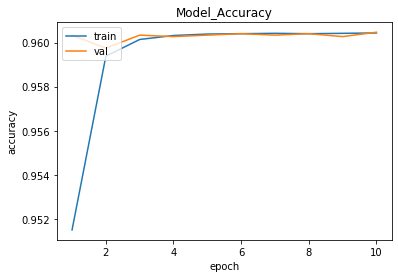

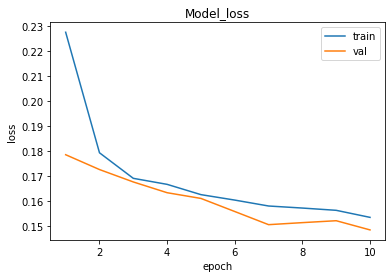

In [0]:
plot_curve(history)

from the above graph its clear that model started overfitting after 8th epoch as yellow line came below the blue

now doing our prediction

In [0]:
a = x_test[1]
a.shape

(251, 1)

In [0]:
a = np.reshape(a,(1,251,1))
a.shape

(1, 251, 1)

yasari chai 2d numpy array 3d hunxa hai gaich

In [0]:
pr = model.predict(a)
print(pr)

[[0.0048339]]


In [0]:
prc = model.predict_classes(a)
print("actual:-" +str(y_test[0])+ "  predicted:-" + str(prc))


actual:-0  predicted:-[[0]]


this is how a neural network is used for checking bank customer satisfaction